$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in C:\Users\user/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-26 Python-3.8.12 torch-1.10.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Look at the inference results and answer the question below.


Image 1:


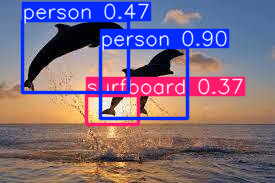

Image 2:


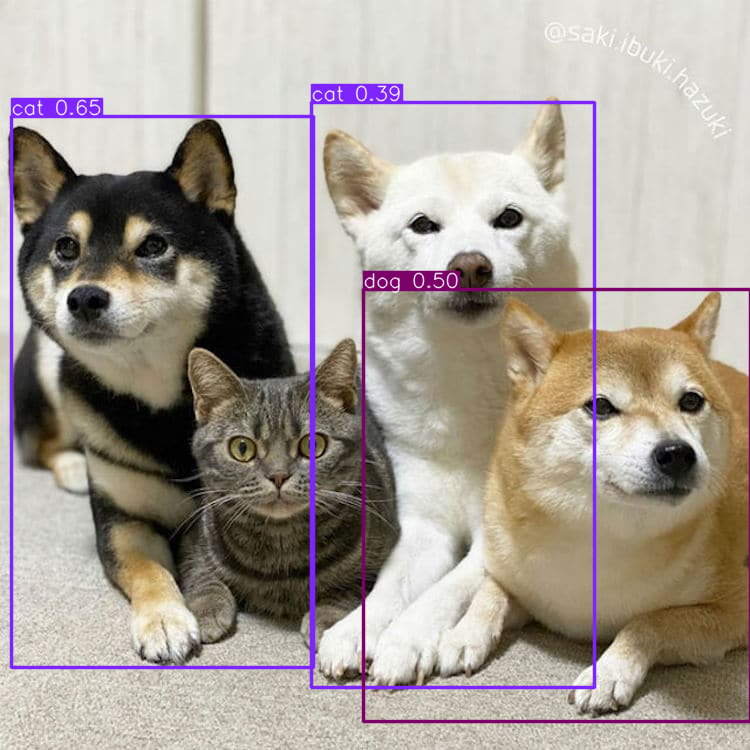

In [2]:
#Insert the inference code here.
with torch.no_grad():
    results1 = model(img1)
    results2 = model(img2)
    print("Image 1:")
    results1.show()
    print("Image 2:")
    results2.show()

### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures? with what confidance?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.
3. recall that we learned how to fool a model by adverserial attack (PGD), describe how you would attack an Object Detection model (such as YOLO).

In [3]:
from cs236781.answers import display_answer
import hw2.answers
display_answer(hw2.answers.part6_q1)


1. The model did a poor job detecting the objects in the images.
In image 1, the model detected 3 objects, but mislabeled one with a high confidence (0.9), and mislabeled the other two with low confidence (0.47 and 0.37).
In image 2, the model correctly labeled one object with confidence 0.5 and mislabeled two objects with confidences 0.39 and 0.65, while not detecting another object at all.

2. There could be several reasons for the failure.
One possible reason is lack of relevant data. If the training was done without enough images of dolphins, the model would have a harder time correctly identifying dolphins. This could be resolved by making sure there are enough images that contain each possible label.
Another reason for mislabeling could be multiple objects in the same box. In image 2, a box containing a dog and a cat was labeled as "cat". To resolve this problem, we could change the model to use instance segmentation and identify every instance.

3. The idea behind an adversarial attack is to manipulate images in a small enough way as to not appear different to humans, but to fool an object detection model. The way to do that is to run an image through the model forward and backward to calculate both the loss and the gradient of the loss, and then to slightly change the image in the direction of the gradient, thereby enhancing the loss as much as possible for the least visual change.



## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

Image 1:


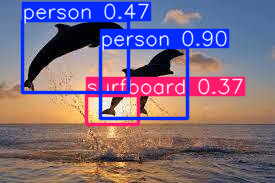

Image 2:


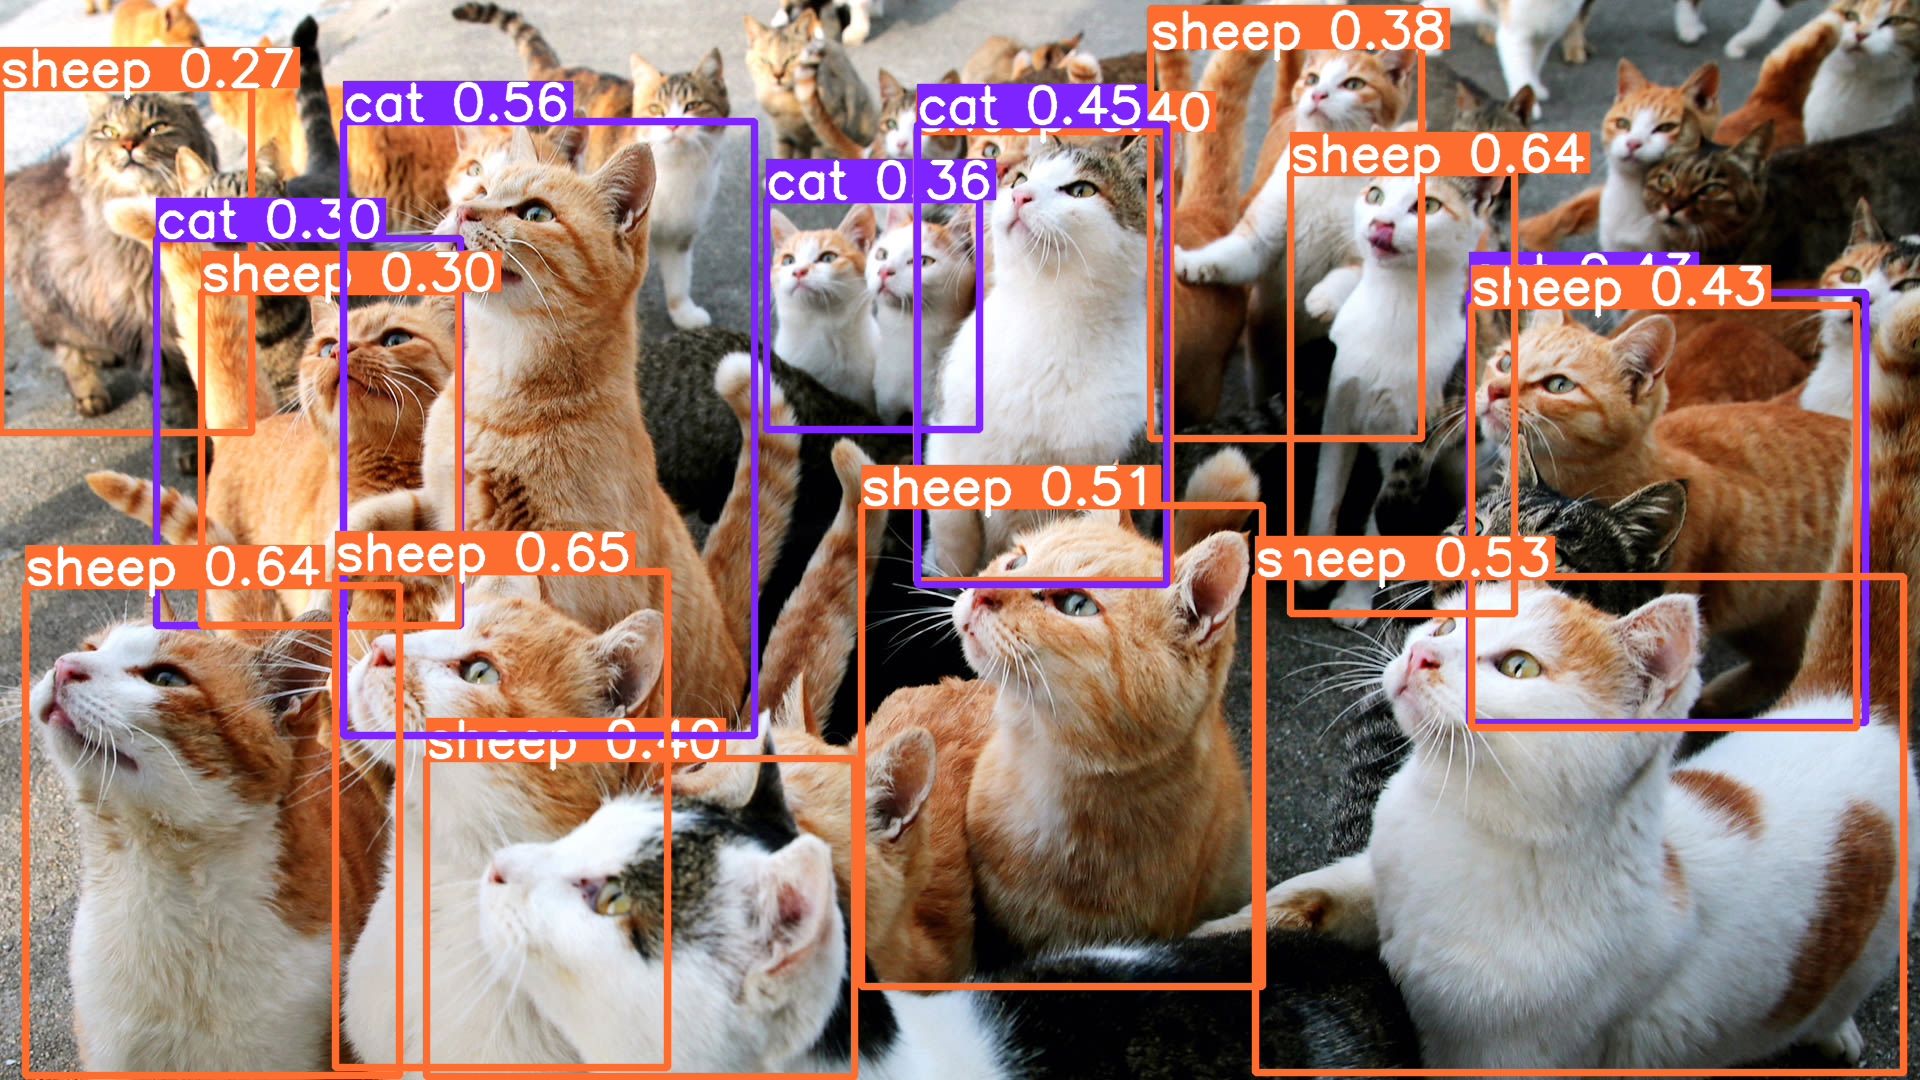

Image 3:


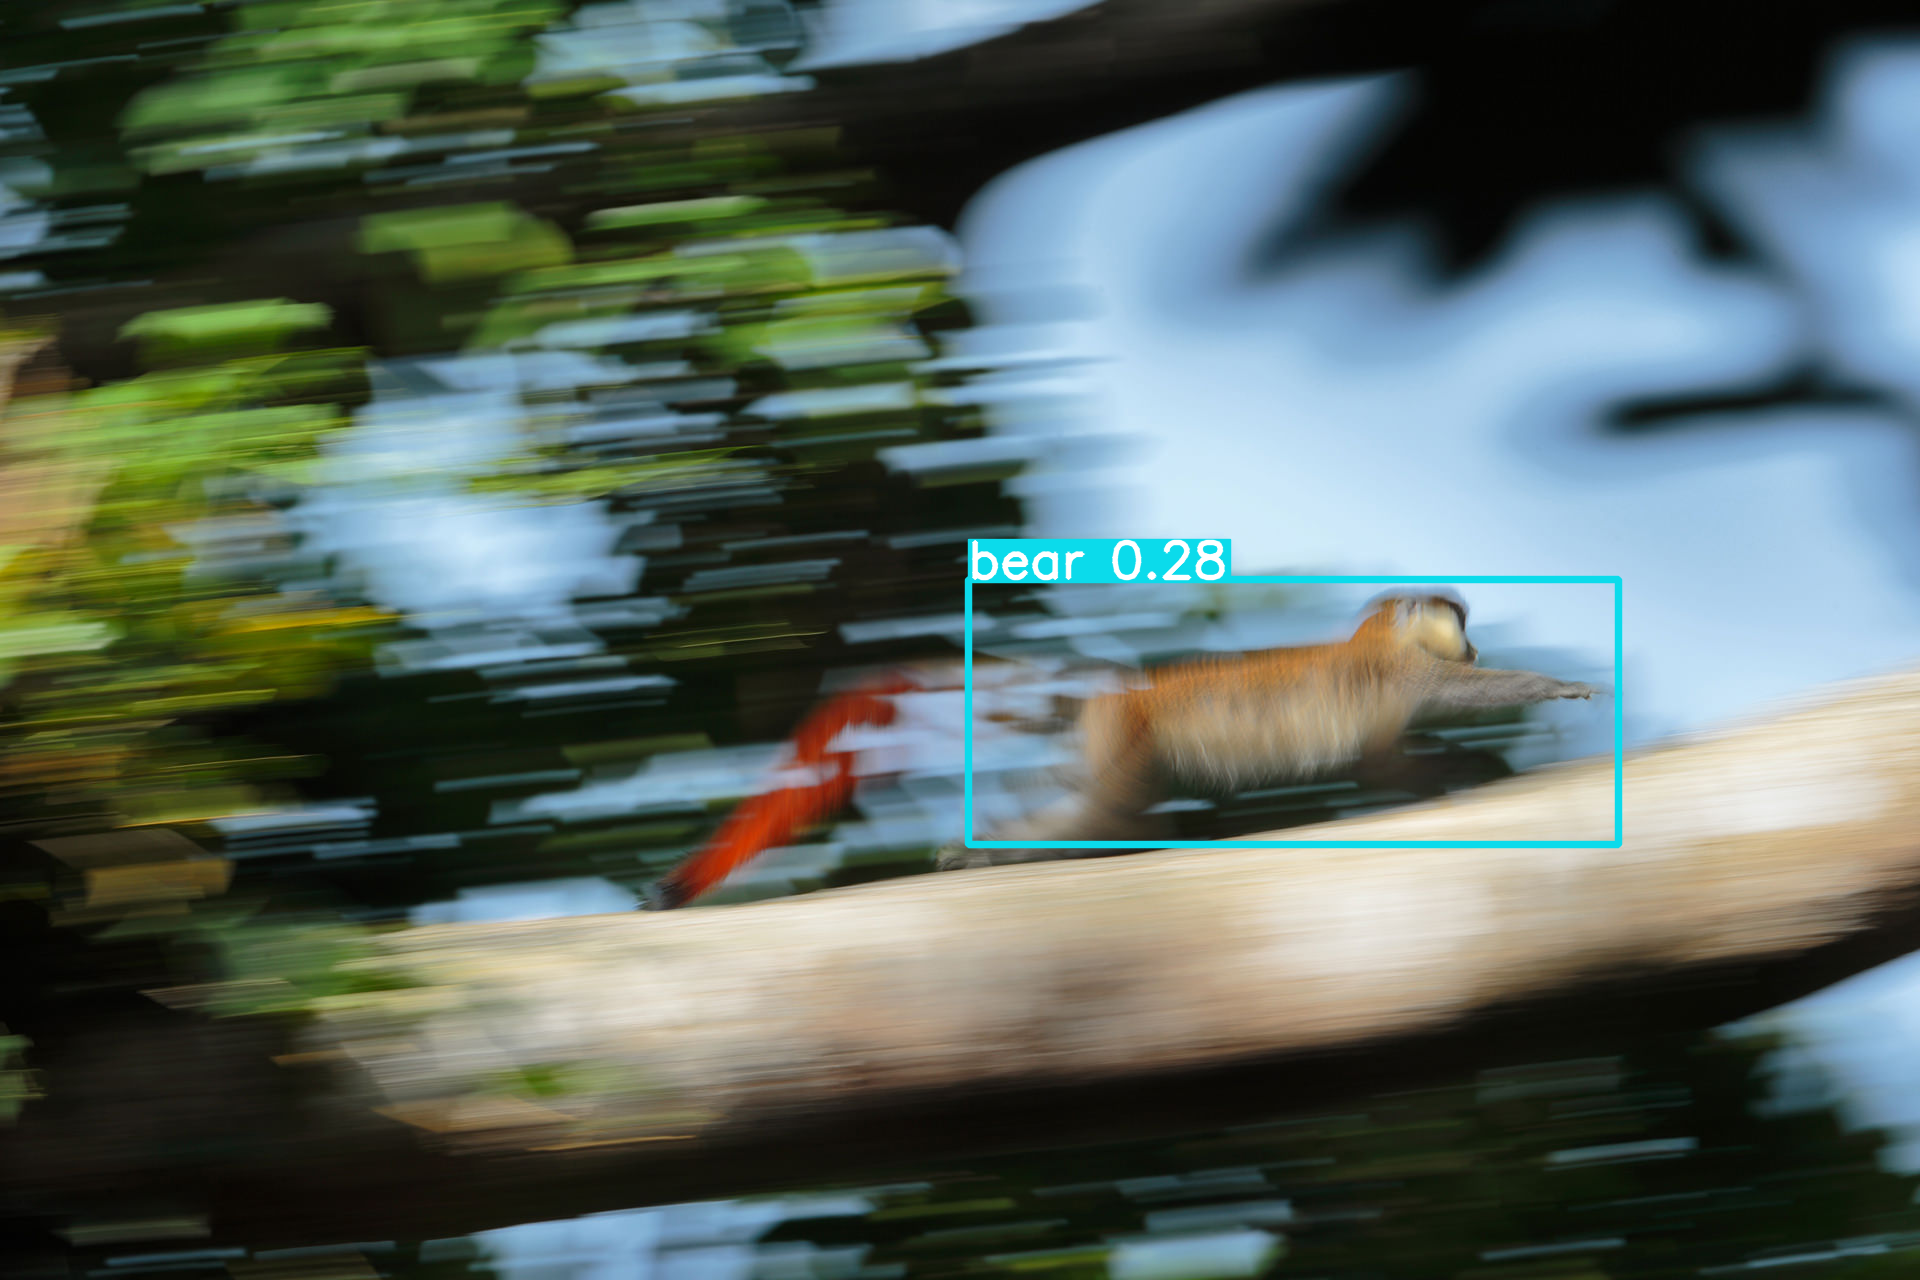

In [4]:
#Insert the inference code here.
img1 = 'imgs/DolphinsInTheSky.jpg'
img2 = 'imgs/cats.jpg'
img3 = 'imgs/monkey.jpg'
with torch.no_grad():
    results1 = model(img1)
    results2 = model(img2)
    results3 = model(img3)
    print("Image 1:")
    results1.show()
    print("Image 2:")
    results2.show()
    print("Image 3:")
    results3.show()

### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [5]:
display_answer(hw2.answers.part6_q3)



Image 1 has bad illumination conditions. The light comes from directly behind the objects and so the model analyzes only shadows.
Image 2 contains many occluded objects that are misidentified and sheep instead of cats.
Image 3 is blurred due to high speed movement, and is misidentified as a bear instead of a monkey


## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

In [6]:
#insert bonus code here

In [7]:
display_answer(hw2.answers.part6_bonus)



**Your answer:**


Write your answer using **markdown** and $\LaTeX$:
```python
# A code block
a = 2
```
An equation: $e^{i\pi} -1 = 0$

